###Week 7: Support Vector Machines (SVM)
Objective: Explore SVM for linear and non-linear classification.

####Experiment 7:

Build an SVM model to classify handwritten digits using the MNIST dataset.
*   Accuracy: Overall percentage of correct predictions.
*   Confusion Matrix: Provides a breakdown of correct/incorrect
predictions for each digit.
*   Classification Report: Detailed precision, recall, and F1-scorefor
each digit.

Note: The MNIST dataset consists of 70,000 grayscale images of handwritten digits (28x28 pixels) representing numbers from 0 to 9. We can use sklearn.datasets.fetch_openml to load the dataset.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVM classifier
svm_clf = SVC(kernel='rbf', gamma='scale')

Accuracy: 0.9631


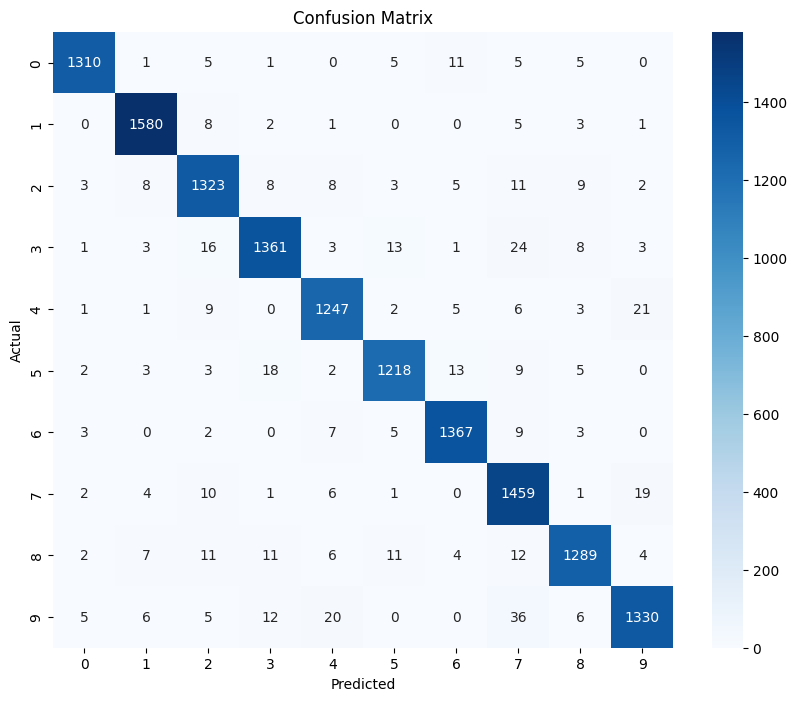

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.98      1396
           7       0.93      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [ ]:
# Train the model
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

report = classification_report(y_test, y_pred)
print(report)